# Functions to use

In this section, we have imported libraries that we need in order to simulate the <b>binomial distribution</b> in the context of the <b>one-dimensional random walk</b> problem. In this problem, you can decide on the probability of taking a random step to the left or to the right and then see where you end up (on average) after a certain number of steps.

If you're only interested in playing around with the results, you can skip this after you "run" these parts. Be sure to click on each set of lines and hit shift-enter to run those parts of the code that defines what you'll need below. Then you can ignore these and go to the next section.

Recall that the probability after $N$ steps that you take $n$ steps to the right if the probability to take a step to the right is $p$ is given by 

$$
  P_N(n) = \frac{N!}{n!(N-n)!} p^n (1-p)^{N-n}
$$


In [4]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import transforms
from numpy.random import default_rng
import scipy.stats as stats
import ipywidgets as widgets

rng = default_rng() # set up pseudo-random number generator

def onewalk(p,N):
    q = 1.0 - p
    x = np.zeros(N+1,dtype=int)
    for n in range(1,N+1):
        r = rng.random()
        if r > p:
            x[n] = x[n-1] - 1
        else:
            x[n] = x[n-1] + 1
    return x

def dowalk(N,M=100,p=0.5,filename=None):

    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    ax_histy.tick_params(axis="y", labelleft=False)

    x=np.zeros((M,N+1),dtype=int)
    for j in range(M):
        x[j] = onewalk(p,N)
        ax.plot(np.arange(N+1),x[j])

    xf = x[:,-1]
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$x$")
    xhist = ax_histy.hist(xf,bins=M//20, orientation='horizontal')
    xm = np.mean(xf)
    xe = np.std(xf)
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(-90)
    y = np.linspace(-N/2, N/2, 1000)
    binmax = np.max(xhist[0])
    ax_histy.plot(y, binmax*np.exp(-(y+xm)**2/2/xe/xe), transform = rot + base)

    ax.plot(np.arange(N+1),xm*np.ones(N+1),'k')
    if filename is not None:
        val = 1
        while(os.path.exists(filename)):
            loc = filename.find(".pdf")
            filename = filename[:loc] + str(val) + ".pdf"
            val += 1
        
        plt.savefig(filename)
    print("After",N,"steps, m_avg =" , xm , "+/-" , xe/np.sqrt(M))

def dowalk2(N,M=100,p=0.5):

    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    ax_histy.tick_params(axis="y", labelleft=False)

    x=np.zeros((M,N+1),dtype=int)
    for j in range(M):
        x[j] = onewalk(p,N)
        ax.plot(np.arange(N+1),x[j])

    xf = x[:,-1]
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$x$")
    xhist = ax_histy.hist(xf,bins=M//20, orientation='horizontal')
    xm = np.mean(xf)
    xe = np.std(xf)
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(-90)
    y = np.linspace(-N/2, N/2, 1000)
    binmax = np.max(xhist[0])
    ax_histy.plot(y, binmax*np.exp(-(y+xm)**2/2/xe/xe), transform = rot + base)

    ax.plot(np.arange(N+1),xm*np.ones(N+1),'k')
    print("After",N,"steps, m_avg =" , xm , "+/-" , xe/np.sqrt(M))


# Try things out

In order to simulate the one-dimensional random walk, you just need to run one function. It is called "dowalk" and it takes in three arguments. The first is $N$, then number of steps your walker will take. The second is $M$, the number of experiments you're running (so how many walkers you have, or how many times your walker takes $N$ steps). Finally, the third argument is $p$, the probability of taking a given step to the right.

To try it out, you can see on the next line:

   dowalk(100,100,0.5)
   
So this has $N=100, M=100$, and $p=0.5$. When you hit shift-enter, you'll see the average number of steps with the error in that value (related to the standard deviation), and a plot. The plot shows $x$ as a function of $t$ for all of the walkers (so it gets quite messy for $N$ large): each colored path is that of one walker, and yes colors are repeated. 

To the right is a histogram that shows the number of times the walker ends at a given point (we bin final points togther, so for example, in the first case, all ending points from 0 to 9 are in one "bin," so they count as the same point). On top of this is the Gaussian distribution for the given walk, superimposed so that you can compare this to the results. 

Note if you run dowalk for the same values, you will get different results because the steps are random, but they average out to the same result in large $N$.



After 1000 steps, m_avg = -0.58 +/- 3.227171516978916


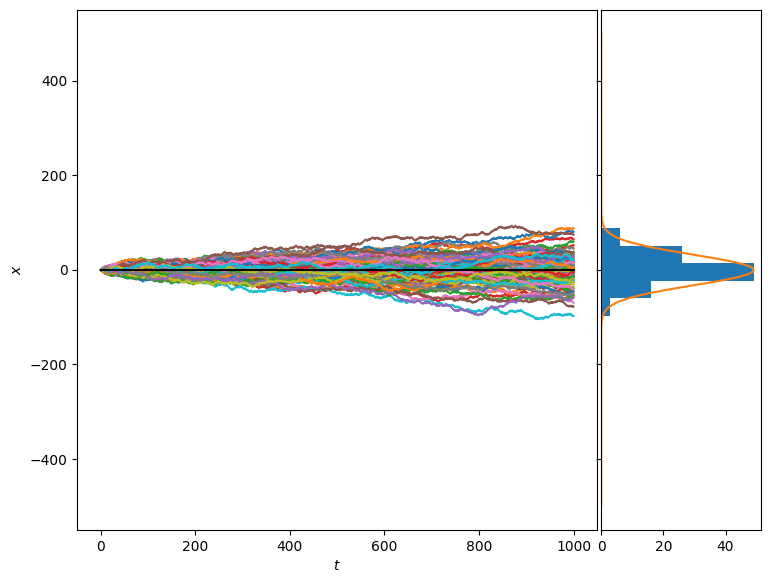

In [5]:
dowalk(1000,100,0.5,"randomwalk.pdf")

Below you can change the various parameters to run the function with (after changing a parameter, wait until the figure loads before changing another). 

In [6]:
sliderSteps = widgets.IntText(min = 10, max = 10000, step = 10, value = 100)
sliderExps = widgets.IntText(min = 100, max = 10000, step = 100, value = 100)

sliderProb = widgets.FloatText(min = 0.0, max = 1.0, step = 0.05, value = 0.5)
        
widgets.interact(dowalk2, N = sliderSteps , M = sliderExps , p = sliderProb);


interactive(children=(IntText(value=100, description='N', step=10), IntText(value=100, description='M', step=1…